In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Shows all columns in dataframe

pd.set_option('display.max_columns', None)


In [3]:
df_origin = pd.read_csv('data/Baltimore_City_Employee_Salaries.csv')

In [4]:
df_origin.head()

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
0,Aaron,D,Kareem,UTILITIES INST REPAIR II,Public Works - Water & Waste Water,A50,34115.0,44557.99,2018-08-27,FY2021,1
1,Aaron,R,Lynda,ELECTION JUDGES REGULAR,D01,D01,0.0,185.00,2020-12-08,FY2021,2
2,Aaron,G,Patricia,FACILITIES/OFFICE SERVICES II,Mayor's Office of Employment Development,A03,63457.0,29461.96,1979-10-24,FY2021,3
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,85450.35,2016-12-12,FY2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,102775.97,2018-04-17,FY2021,5


In [5]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154187 entries, 0 to 154186
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   lastName       153777 non-null  object 
 1   middleInitial  121195 non-null  object 
 2   firstName      154187 non-null  object 
 3   jobClass       154003 non-null  object 
 4   agencyName     154187 non-null  object 
 5   agencyID       154187 non-null  object 
 6   annualSalary   154187 non-null  float64
 7   grossPay       154187 non-null  float64
 8   hireDate       154185 non-null  object 
 9   fiscalYear     154187 non-null  object 
 10  ObjectId       154187 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 12.9+ MB


In [6]:
df_origin.columns

Index(['lastName', 'middleInitial', 'firstName', 'jobClass', 'agencyName',
       'agencyID', 'annualSalary', 'grossPay', 'hireDate', 'fiscalYear',
       'ObjectId'],
      dtype='object')

In [7]:
df_origin['agencyName'].value_counts()

Police Department                     34707
Fire Department                       18374
Public Works - Water & Waste Water    16353
Health Department                      9640
Transportation - Highways              7007
                                      ...  
War Memorial Commission                   8
Wage Commissioner                         3
HLTH-Emergency Medical Team               3
FIN-RSP Admin (001)                       2
Una 01 (001)                              1
Name: agencyName, Length: 71, dtype: int64

In [8]:
reqd_depts = ['Police Department', 'Fire Department', 'Health Department']
df_init = df_origin.loc[df_origin['agencyName'].isin(reqd_depts) ]
df_init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62721 entries, 3 to 154186
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lastName       62327 non-null  object 
 1   middleInitial  53430 non-null  object 
 2   firstName      62721 non-null  object 
 3   jobClass       62623 non-null  object 
 4   agencyName     62721 non-null  object 
 5   agencyID       62721 non-null  object 
 6   annualSalary   62721 non-null  float64
 7   grossPay       62721 non-null  float64
 8   hireDate       62720 non-null  object 
 9   fiscalYear     62721 non-null  object 
 10  ObjectId       62721 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 5.7+ MB


In [9]:
df_init.head()

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,85450.35,2016-12-12,FY2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,102775.97,2018-04-17,FY2021,5
7,Abdal-Rahim,A,Naim,FIRE PUMP OPERATOR SUPPRESSION,Fire Department,A64,72007.0,103168.86,2011-03-30,FY2021,8
8,Abdi,W,Ezekiel,POLICE SERGEANT,Police Department,A99,97058.0,143215.40,2007-06-14,FY2021,9
9,Abdrabou,NaN,Fouad,POLICE OFFICER,Police Department,A99,55117.0,41074.56,2020-08-25,FY2021,10


In [10]:
df_init.loc[df_init.index, ['fiscalYear']] = df_init['fiscalYear'].str.slice(2,6).astype(int)

In [11]:
df_init.head()

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
3,Abadir,O,Adam,OPERATIONS OFFICER II,Health Department,A65,74299.0,85450.35,2016-12-12,2021,4
4,Abaku,O,Aigbolosimuan,POLICE OFFICER EID,Police Department,A99,68226.0,102775.97,2018-04-17,2021,5
7,Abdal-Rahim,A,Naim,FIRE PUMP OPERATOR SUPPRESSION,Fire Department,A64,72007.0,103168.86,2011-03-30,2021,8
8,Abdi,W,Ezekiel,POLICE SERGEANT,Police Department,A99,97058.0,143215.40,2007-06-14,2021,9
9,Abdrabou,NaN,Fouad,POLICE OFFICER,Police Department,A99,55117.0,41074.56,2020-08-25,2021,10


In [12]:
# df_init.sort_values(by = ['agencyName','lastName', 'firstName', 'hireDate', 'fiscalYear'], ascending = [True, True, True, True, False], inplace = True)

In [13]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62721 entries, 3 to 154186
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lastName       62327 non-null  object 
 1   middleInitial  53430 non-null  object 
 2   firstName      62721 non-null  object 
 3   jobClass       62623 non-null  object 
 4   agencyName     62721 non-null  object 
 5   agencyID       62721 non-null  object 
 6   annualSalary   62721 non-null  float64
 7   grossPay       62721 non-null  float64
 8   hireDate       62720 non-null  object 
 9   fiscalYear     62721 non-null  object 
 10  ObjectId       62721 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 7.8+ MB


In [14]:
df_init.loc[df_init['lastName'].isna()]

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
43678,NaN,1,BPD,BPD 1,Police Department,A99,90833.0,115187.12,1999-02-11,2019,43679
43679,NaN,0,BPD,BPD 10,Police Department,A99,87151.0,120470.46,2001-01-03,2019,43680
43688,NaN,1,BPD,BPD 11,Police Department,A99,91008.0,112361.89,1996-08-01,2019,43689
43694,NaN,2,BPD,BPD 12,Police Department,A99,80295.0,97460.98,2007-02-20,2019,43695
43700,NaN,2,BPD,BPD 2,Police Department,A99,90833.0,109199.22,1999-01-25,2019,43701
...,...,...,...,...,...,...,...,...,...,...,...
154182,NaN,9,BPD,BPD,Police Department,A99,65499.0,64127.83,1970-01-01,2011,154183
154183,NaN,0,BPD,BPD,Police Department,A99,63384.0,66187.45,1970-01-01,2011,154184
154184,NaN,1,BPD,BPD,Police Department,A99,61102.0,71989.51,1970-01-01,2011,154185
154185,NaN,2,BPD,BPD,Police Department,A99,59958.0,53235.59,1970-01-01,2011,154186


In [15]:
# df_init['lastName'].fillna('BPD', inplace = True)
df_init.loc[df_init['lastName'].isna(), 'lastName'] = 'BPD'

In [16]:
df_init.loc[df_init['lastName'] == 'BPD']

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
43678,BPD,1,BPD,BPD 1,Police Department,A99,90833.0,115187.12,1999-02-11,2019,43679
43679,BPD,0,BPD,BPD 10,Police Department,A99,87151.0,120470.46,2001-01-03,2019,43680
43688,BPD,1,BPD,BPD 11,Police Department,A99,91008.0,112361.89,1996-08-01,2019,43689
43694,BPD,2,BPD,BPD 12,Police Department,A99,80295.0,97460.98,2007-02-20,2019,43695
43700,BPD,2,BPD,BPD 2,Police Department,A99,90833.0,109199.22,1999-01-25,2019,43701
...,...,...,...,...,...,...,...,...,...,...,...
154182,BPD,9,BPD,BPD,Police Department,A99,65499.0,64127.83,1970-01-01,2011,154183
154183,BPD,0,BPD,BPD,Police Department,A99,63384.0,66187.45,1970-01-01,2011,154184
154184,BPD,1,BPD,BPD,Police Department,A99,61102.0,71989.51,1970-01-01,2011,154185
154185,BPD,2,BPD,BPD,Police Department,A99,59958.0,53235.59,1970-01-01,2011,154186


In [17]:
df_init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62721 entries, 3 to 154186
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lastName       62721 non-null  object 
 1   middleInitial  53430 non-null  object 
 2   firstName      62721 non-null  object 
 3   jobClass       62623 non-null  object 
 4   agencyName     62721 non-null  object 
 5   agencyID       62721 non-null  object 
 6   annualSalary   62721 non-null  float64
 7   grossPay       62721 non-null  float64
 8   hireDate       62720 non-null  object 
 9   fiscalYear     62721 non-null  object 
 10  ObjectId       62721 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 7.8+ MB


In [18]:
df_init.loc[df_init['hireDate'].isna()]

,lastName,middleInitial,firstName,jobClass,agencyName,agencyID,annualSalary,grossPay,hireDate,fiscalYear,ObjectId
6097,Horsey,C,Rashad,POLICE OFFICER TRAINEE,Police Department,A99,55117.0,20857.58,NaN,2021,6098


In [19]:
df_recent_yrs = df_init.loc[df_init['fiscalYear'] >= 2014]

In [20]:
df_recent_yrs .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44786 entries, 3 to 111521
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   lastName       44786 non-null  object 
 1   middleInitial  38029 non-null  object 
 2   firstName      44786 non-null  object 
 3   jobClass       44688 non-null  object 
 4   agencyName     44786 non-null  object 
 5   agencyID       44786 non-null  object 
 6   annualSalary   44786 non-null  float64
 7   grossPay       44786 non-null  float64
 8   hireDate       44785 non-null  object 
 9   fiscalYear     44786 non-null  object 
 10  ObjectId       44786 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 4.1+ MB


In [21]:
df_recent_yrs['agencyName'].value_counts()

Police Department    24530
Fire Department      13278
Health Department     6978
Name: agencyName, dtype: int64

In [22]:
df_recent_yrs = df_recent_yrs.drop(['lastName', 'middleInitial', 'firstName', 'agencyID', 'grossPay', 'hireDate','ObjectId'], axis=1)

In [23]:
df_recent_yrs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44786 entries, 3 to 111521
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   jobClass      44688 non-null  object 
 1   agencyName    44786 non-null  object 
 2   annualSalary  44786 non-null  float64
 3   fiscalYear    44786 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.7+ MB


In [24]:
df_recent_yrs.head()

,jobClass,agencyName,annualSalary,fiscalYear
3,OPERATIONS OFFICER II,Health Department,74299.0,2021
4,POLICE OFFICER EID,Police Department,68226.0,2021
7,FIRE PUMP OPERATOR SUPPRESSION,Fire Department,72007.0,2021
8,POLICE SERGEANT,Police Department,97058.0,2021
9,POLICE OFFICER,Police Department,55117.0,2021


In [25]:
df_police = df_recent_yrs.loc[df_recent_yrs['agencyName'] == 'Police Department']
df_fire = df_recent_yrs.loc[df_recent_yrs['agencyName'] == 'Fire Department']
df_health = df_recent_yrs.loc[df_recent_yrs['agencyName'] == 'Health Department']


In [66]:
payroll_police=[]
payroll_fire=[]
payroll_health=[]
payroll_years=[]

for year in range(2014,2022):
    payroll_police.append(df_police.loc[df_police['fiscalYear'] == year]['annualSalary'].sum())
    payroll_fire.append(df_fire.loc[df_fire['fiscalYear'] == year]['annualSalary'].sum())
    payroll_health.append(df_health.loc[df_health['fiscalYear'] == year]['annualSalary'].sum())
    payroll_years.append(year)

# payroll_police = list(payroll_police)

df_payroll = pd.DataFrame(list(zip(payroll_years, payroll_police, payroll_fire, payroll_health)))
df_payroll.columns = ['fiscalYear', 'Police_Dept', 'Fire_Dept', 'Health_Dept']
df_payroll['date'] = df_payroll['fiscalYear'] * 10000 + 101
df_payroll['date'] = df_payroll['date'].astype(str)
df_payroll.head(20)

,fiscalYear,Police_Dept,Fire_Dept,Health_Dept,date
0,2014,1.976886e+08,1.120108e+08,34305637.00,20140101
1,2015,2.087338e+08,1.126165e+08,36294814.00,20150101
2,2016,2.155936e+08,1.118375e+08,37012032.00,20160101
3,2017,2.101303e+08,1.163164e+08,34486200.00,20170101
4,2018,2.213949e+08,1.205536e+08,40824800.00,20180101
5,2019,2.311541e+08,1.219408e+08,38077508.50,20190101
6,2020,2.502885e+08,1.295694e+08,46438958.00,20200101
7,2021,2.515990e+08,1.257620e+08,49567469.03,20210101


In [67]:
df_payroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fiscalYear   8 non-null      int64  
 1   Police_Dept  8 non-null      float64
 2   Fire_Dept    8 non-null      float64
 3   Health_Dept  8 non-null      float64
 4   date         8 non-null      object 
dtypes: float64(3), int64(1), object(1)
memory usage: 448.0+ bytes


In [68]:
df_payroll = df_payroll.set_index(pd.to_datetime((df_payroll['date']), yearfirst=True))


In [69]:
df_payroll.head()

,fiscalYear,Police_Dept,Fire_Dept,Health_Dept,date
date,,,,,
2014-01-01,2014,197688621.0,1.120108e+08,34305637.0,20140101
2015-01-01,2015,208733826.0,1.126165e+08,36294814.0,20150101
2016-01-01,2016,215593592.0,1.118375e+08,37012032.0,20160101
2017-01-01,2017,210130273.0,1.163164e+08,34486200.0,20170101
2018-01-01,2018,221394927.0,1.205536e+08,40824800.0,20180101


<AxesSubplot:xlabel='fiscalYear'>

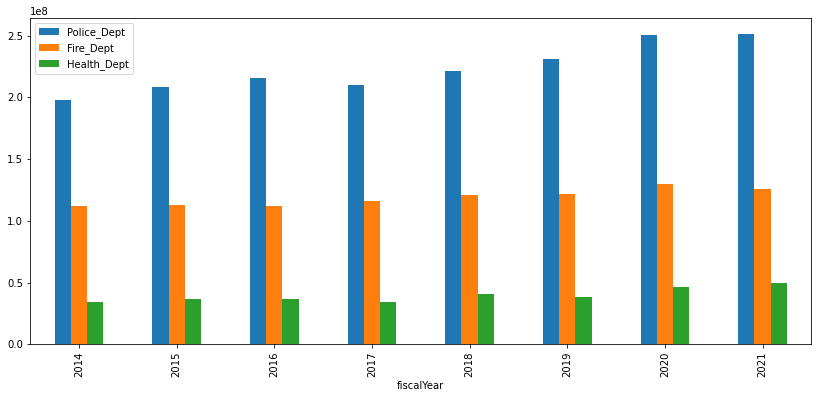

In [70]:
df_payroll.plot(x="fiscalYear", y=["Police_Dept", "Fire_Dept", "Health_Dept"], kind="bar", figsize=(14, 6))


<AxesSubplot:xlabel='fiscalYear'>

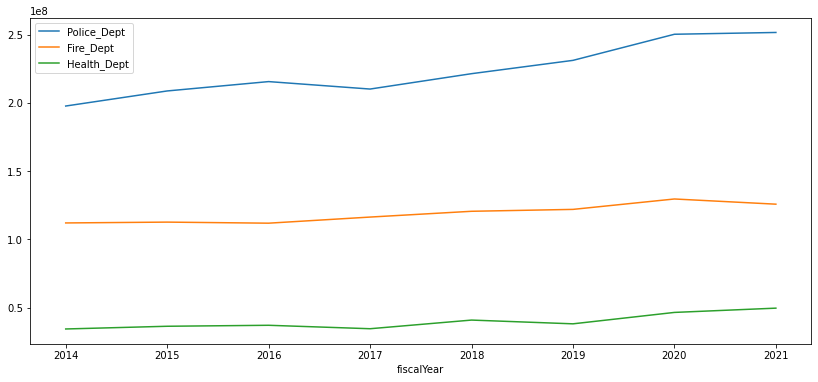

In [71]:
df_payroll.plot(x="fiscalYear", y=["Police_Dept", "Fire_Dept", "Health_Dept"], kind="line", figsize=(14, 6))


<AxesSubplot:xlabel='fiscalYear'>

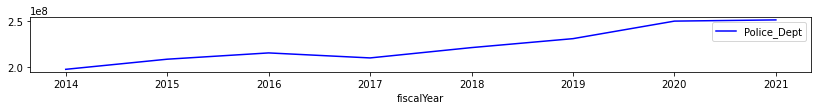

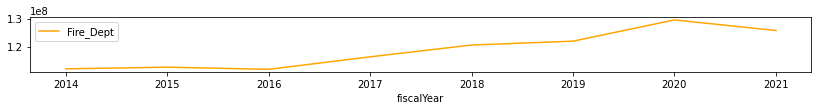

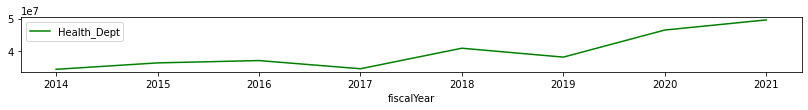

In [73]:
df_payroll.plot(x="fiscalYear", y=["Police_Dept"], kind="line", figsize=(14, 1), color='blue')
df_payroll.plot(x="fiscalYear", y=["Fire_Dept"], kind="line", figsize=(14, 1), color='orange')
df_payroll.plot(x="fiscalYear", y=["Health_Dept"], kind="line", figsize=(14, 1), color='green')


# Angelica:  
**If you are reading this, don't worry. I was stuck on some python fundamental issues but am moving beyond that and am working on modeling now. Will update over the next couple of days.**